In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=False,
                          figsize=None,
                          cmap='Blues',
                          fmt="",
                          title=None,
                          ylabel="",
                          xlabel="",
                          save=False,
                          file_name=""):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=True,fmt=fmt,cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel(ylabel)
        plt.xlabel(xlabel + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    
    if save:
        #fig = ax.get_figure()
        ax.figure.savefig("{}.svg".format(file_name))

In [ ]:
patient_level_confusion_matrix = np.array([[11068, 698],
                                           [1124, 10551]])

bert_patient_level_confusion_matrix = np.array([[11365, 739],
                                               [827, 1010]])

In [4]:
lr_patient_level = np.array([[21,  3],
                             [ 3, 25]])

In [ ]:
sequence_level_confusion_matrix = np.array([[ 83, 7, 14],
                                             [ 10, 124, 7],
                                             [  6, 3, 39]])

bert_sequence_level_confusion_matrix = np.array([[102,1,1],
                                                [7,125,2],
                                                [6,4,45]])

In [ ]:
no_yes = np.array([ [83, 6],
                    [14, 39]])

In [ ]:
no_ntr = np.array([[83,10],
                   [7,124]])

In [ ]:
yes_ntr = np.array([[39,7],
                   [3,124]])

## Precision Matrices

<ipython-input-5-4589e7c4aaf1>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  make_confusion_matrix(lr_patient_level/lr_patient_level.astype(np.float).sum(axis=0), categories=categories, cmap='Blues',  fmt='.3f', save = True, file_name = "patient_level_precision_mat_1_29")


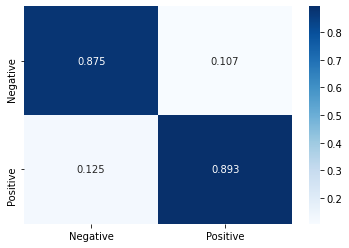

In [5]:
# Precision
categories = ['Negative', 'Positive']
make_confusion_matrix(lr_patient_level/lr_patient_level.astype(np.float).sum(axis=0), categories=categories, cmap='Blues',  fmt='.3f', save = True, file_name = "patient_level_precision_mat_1_29")

In [ ]:
# Precision
categories = ['Negative', 'Neither', 'Positive']
make_confusion_matrix(sequence_level_confusion_matrix/sequence_level_confusion_matrix.astype(np.float).sum(axis=0), categories=categories, cmap='Blues',  fmt='.3f', save = True, file_name = "conf_mat")

In [ ]:
make_confusion_matrix(bert_sequence_level_confusion_matrix/bert_sequence_level_confusion_matrix.astype(np.float).sum(axis=0), categories=categories, cmap='Blues',  fmt='.3f', save = True, file_name = "bert_conf_mat")

In [ ]:
# Recall
make_confusion_matrix(sequence_level_confusion_matrix/sequence_level_confusion_matrix.astype(np.float).sum(axis=1)[:,None], categories=categories, cmap='Blues',  fmt='.3f', save = True, file_name = "recall_matrix")

## Figure 4a

In [ ]:
categories = ['Negative', 'Positive']

make_confusion_matrix(bert_patient_level_confusion_matrix, categories=categories, cmap='Blues', ylabel = "Predicted as having CI", xlabel = "Prescence of ICD Code / Medication", save = True, file_name = "bert_patient_predictions")

## Patient Level Heatmaps 

In [ ]:
categories = ['Negative', 'Positive']
make_confusion_matrix(patient_level_confusion_matrix, categories=categories, cmap='Blues')

In [ ]:
# Normalized by Column
make_confusion_matrix((patient_level_confusion_matrix / patient_level_confusion_matrix.astype(np.float).sum(axis=0)), categories=categories, cmap='Blues', fmt='.3f')

In [ ]:
# Normalized by Row
make_confusion_matrix((patient_level_confusion_matrix / patient_level_confusion_matrix.astype(np.float).sum(axis=1)[:, np.newaxis]), categories=categories, cmap='Blues', fmt='.3f')